<div style="background-color:#007BFF; padding:15px; border-radius:8px; width: 95%; margin: auto; overflow: hidden;">
  <h2 style="color:white; font-weight:bold; text-align:center; margin:0;">
    Predicción de Daño Renal Crónico con <br> Aprendizaje Automático
  </h2>
</div>



<div style="background-color:#e6f2ff; padding:25px; border-radius:12px; border:2px solid #007BFF; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; width:95%; margin:auto; box-sizing:border-box;">
  <h2 style="color:#003366; font-weight:bold; text-align:center; margin-top:0; margin-bottom:20px;">
    📘 Índice del Proyecto
  </h2>
  <ul style="font-size:17px; line-height:2; color:#000; padding-left:20px;">
    <li><strong>1. Introducción</strong></li>
    <li><strong>2. Descripción del conjunto de datos</strong></li>
    <li><strong>3. Análisis exploratorio de datos (EDA)</strong></li>
    <li><strong>4. Limpieza y preprocesamiento</strong></li>
    <li><strong>5. Selección de características</strong></li>
    <li><strong>6. Modelado y entrenamiento</strong></li>
    <li><strong>7. Evaluación del modelo</strong></li>
    <li><strong>8. Conclusiones</strong></li>
    <li><strong>9. Recomendaciones futuras</strong></li>
  </ul>
</div>


<div style="background-color:#f4f8fc; padding:25px; border-left:6px solid #007BFF; border-radius:12px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; width:95%; margin:auto; box-sizing:border-box;">

  <h2 style="margin-top:0; color:#004080;">🩺 <strong>1. Introducción</strong></h2>

  <p style="font-size:16px; line-height:1.6;">
    La <strong>enfermedad renal crónica (ERC)</strong> es una afección médica silenciosa que afecta a millones de personas en el mundo y puede avanzar sin síntomas hasta etapas críticas. Detectarla de forma temprana permite tomar decisiones clínicas oportunas y prevenir daños irreversibles.
  </p>

  <p style="font-size:16px; line-height:1.6;">
    En este proyecto se aplican técnicas de <strong>aprendizaje automático (machine learning)</strong> para desarrollar un modelo predictivo que identifique el riesgo de daño renal a partir de variables clínicas y de laboratorio.
  </p>

</div>


<div style="background-color:#f4f8fc; padding:25px; border-left:6px solid #007BFF; border-radius:12px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; width:95%; margin:auto; box-sizing:border-box;">

  <h2 style="margin-top:0; color:#004080;">📊 <strong>2. Descripción del conjunto de datos</strong></h2>

  <p style="font-size:16px; line-height:1.6;">
    El conjunto de datos utilizado proviene de la plataforma <strong>Kaggle</strong> y contiene registros clínicos de pacientes con diferentes condiciones renales. Cada registro incluye variables tanto numéricas como categóricas relacionadas con factores médicos clave.
  </p>

  <p style="font-size:16px; line-height:1.6;">
    Entre las variables disponibles se encuentran: <strong>edad</strong>, <strong>nivel de creatinina</strong>, <strong>presencia de diabetes o hipertensión</strong>, <strong>tasa de filtración glomerular (GFR)</strong>, <strong>salida de orina</strong>, entre otras. Estas características permiten construir un modelo predictivo que evalúe el riesgo de daño renal crónico.
  </p>

  <p style="font-size:16px; line-height:1.6;">
    La variable objetivo es <strong>"Dialysis_Needed"</strong>, que indica si un paciente requiere o no tratamiento de diálisis, lo cual permite abordar el problema como una tarea de clasificación binaria.
  </p>

</div>


<a id="3-analisis-exploratorio"></a>
<div style="background-color:#f4f8fc; padding:25px; border-left:6px solid #007BFF; border-radius:12px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; width:95%; margin:auto; box-sizing:border-box;">

  <h2 style="margin-top:0; color:#004080;">📊 <strong>3. Análisis Exploratorio de Datos (EDA)</strong></h2>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    En esta sección se lleva a cabo un <strong>análisis exploratorio de datos (EDA)</strong> sobre el conjunto de datos relacionado con el riesgo de enfermedad renal. 
    A través de visualizaciones y estadísticas descriptivas, se busca comprender la distribución de las variables, identificar patrones, y explorar posibles relaciones entre las características clínicas y la variable objetivo.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Este análisis es esencial para detectar tendencias, correlaciones, valores extremos y diferencias entre pacientes con y sin necesidad de diálisis, lo que permitirá una mejor preparación de los datos antes del modelado.
  </p>

</div>


In [3]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

In [4]:
# Importamos el conjunto de datos de la Carpeta Raíz
df = pd.read_csv('../data/kidney_disease_dataset.csv')

In [5]:
# Verificación del Número total de columnas y filas
df.shape

(2304, 9)

In [6]:
# Información adicional del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2304 non-null   int64  
 1   Creatinine_Level  2304 non-null   float64
 2   BUN               2304 non-null   float64
 3   Diabetes          2304 non-null   int64  
 4   Hypertension      2304 non-null   int64  
 5   GFR               2304 non-null   float64
 6   Urine_Output      2304 non-null   float64
 7   CKD_Status        2304 non-null   int64  
 8   Dialysis_Needed   2304 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 162.1 KB


In [7]:
# Visualización general del Conjunto de Datos
df.head()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0


In [8]:
# Verificación de existencias de valores nulos
df.isna().sum()

Age                 0
Creatinine_Level    0
BUN                 0
Diabetes            0
Hypertension        0
GFR                 0
Urine_Output        0
CKD_Status          0
Dialysis_Needed     0
dtype: int64

In [9]:
# Verificación de valores duplicados dentro del Conjunto
df.duplicated().value_counts()

False    2304
Name: count, dtype: int64

<div style="background-color:#ffffff; border:1px solid #dbe7ff; border-radius:8px; padding:18px; margin-left:10px; margin-right:10px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; word-wrap:break-word; overflow-wrap:break-word; box-sizing:border-box;">

<p style="font-size:15px; line-height:1.6; margin:0;">
Después de un análisis preliminar, podemos observar que el conjunto de datos se encuentra en condiciones óptimas. 
Por ejemplo, contiene <strong>2,304 filas</strong>, ninguna con valores nulos ni duplicados. 
Asimismo, los tipos de datos en las <strong>9 columnas</strong> corresponden correctamente con la naturaleza de cada variable. Durante el preprocesamiento, se hará una modificación en los nombres de las columnas para homogenizarlos y tener un mejor control sobre ellas.  
</p>

<p style="font-size:15px; line-height:1.6; margin-top:14px;">
En consecuencia, pasaremos a observar de forma más <em>visual</em> nuestro conjunto de datos mediante gráficos y estadísticas descriptivas.
</p>

</div>


C:\Users\Albert\AppData\Local\Temp\ipykernel_11276\1783451628.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico_ckd.set_xticklabels(['No', 'Si'])


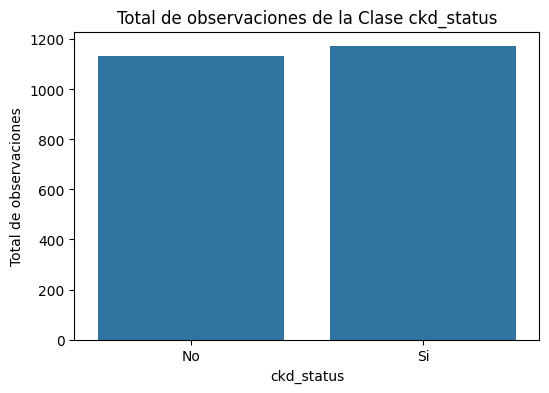

In [10]:
# Totales de las clases CKD_STATUS del Conjunto

plt.figure(figsize=(6, 4))
grafico_ckd = sns.countplot(data=df, x=df['CKD_Status'])
plt.title('Total de observaciones de la Clase ckd_status')
plt.xlabel('ckd_status')
plt.ylabel('Total de observaciones')
grafico_ckd.set_xticklabels(['No', 'Si'])
plt.show()

In [11]:
# Suma total
df['CKD_Status'].value_counts()

CKD_Status
1    1172
0    1132
Name: count, dtype: int64

C:\Users\Albert\AppData\Local\Temp\ipykernel_11276\4289309498.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico_dialysis.set_xticklabels(['No', 'Si'])


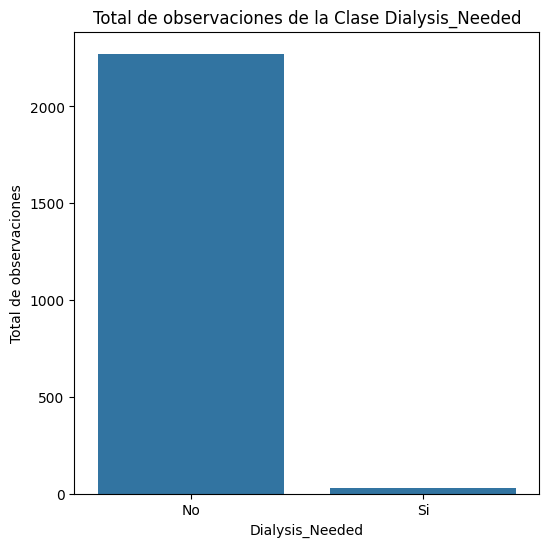

In [12]:
# Total de observaciones de la clase Dialysis_Needed
plt.figure(figsize=(6, 6))
grafico_dialysis = sns.countplot(data=df, x=df['Dialysis_Needed'])
plt.title('Total de observaciones de la Clase Dialysis_Needed')
plt.xlabel('Dialysis_Needed')
plt.ylabel('Total de observaciones')
grafico_dialysis.set_xticklabels(['No', 'Si'])
plt.show()

In [13]:
# Suma total
df['Dialysis_Needed'].value_counts()

Dialysis_Needed
0    2273
1      31
Name: count, dtype: int64

<div style="background-color:#ffffff; border:1px solid #dbe7ff; border-radius:8px; padding:18px; font-family:'Segoe UI', sans-serif; color:#1a1a1a;">

<h3 style="margin-top:0; color:#004080;">📌 Distribución de las clases objetivo</h3>

<p style="font-size:15px; line-height:1.6;">
Tras analizar las clases principales del conjunto de datos que servirán como base para el desarrollo del modelo de <strong>Machine Learning</strong>, encontramos información relevante:
</p>

<div style="margin-top:12px; margin-bottom:12px;">
  <h4 style="color:#003366; margin-bottom:6px;">🩺 CKD_Status <span style="font-size:14px; color:#555;">(Enfermedad Renal Crónica)</span></h4>
  <ul style="font-size:15px; line-height:1.6; margin:0;">
    <li><strong>Sí:</strong> 1172 casos</li>
    <li><strong>No:</strong> 1132 casos</li>
  </ul>
</div>

<div style="margin-top:12px; margin-bottom:12px;">
  <h4 style="color:#003366; margin-bottom:6px;">💉 Dialysis_Needed <span style="font-size:14px; color:#555;">(Necesidad de diálisis)</span></h4>
  <ul style="font-size:15px; line-height:1.6; margin:0;">
    <li><strong>Sí:</strong> 31 casos</li>
    <li><strong>No:</strong> 2273 casos</li>
  </ul>
  <p style="font-size:14px; color:#aa0000; margin-top:6px;">
  ⚠️ Esta variable presenta un <strong>fuerte desbalance</strong>, lo que será importante considerar al momento de entrenar y evaluar el modelo.
  </p>
</div>

<p style="font-size:15px; line-height:1.6; margin-top:14px;">
Con esto ya comprendemos cómo se comportan nuestras clases objetivo.  
➡️ El siguiente paso será analizar las <strong>correlaciones entre variables</strong> para identificar relaciones significativas.
</p>

</div>


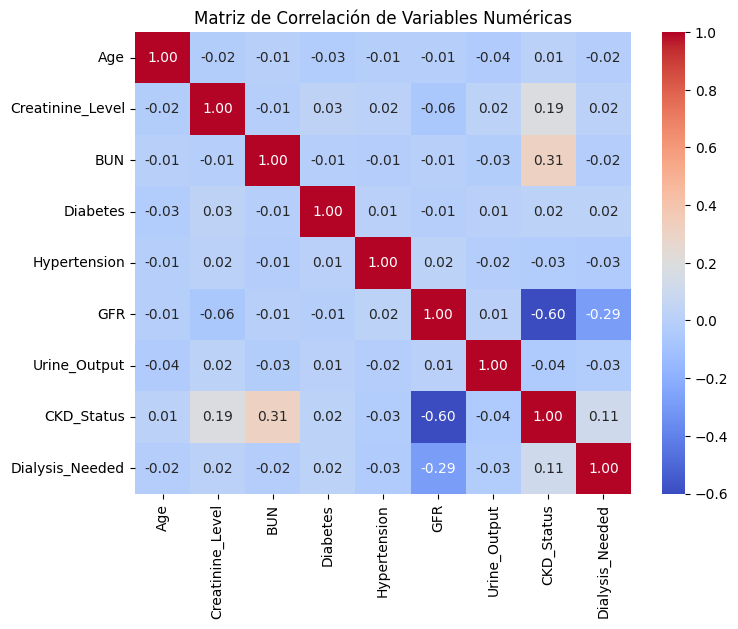

In [14]:
# Matriz de Correlación
matriz_corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

<div style="background-color:#ffffff; border:1px solid #dbe7ff; border-radius:8px; padding:18px; margin-left:10px; margin-right:10px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; word-wrap:break-word; overflow-wrap:break-word; box-sizing:border-box;">

<h3 style="margin-top:0; color:#004080;">📊 Matriz de Correlación de Variables Numéricas</h3>

<p style="font-size:15px; line-height:1.6;">
Como podemos observar en la matriz de correlación, existe una <strong>fuerte correlación negativa</strong> entre la variable <strong>GFR</strong> (Tasa de Filtración Glomerular) y <strong>CKD_Status</strong> (estado de enfermedad renal crónica), con un coeficiente de <strong>-0.60</strong>.
Esto indica que, a medida que disminuye la GFR, aumenta la probabilidad de que un paciente tenga enfermedad renal crónica, lo cual es consistente con el conocimiento médico, ya que una GFR baja es un indicador clave de daño renal.
</p>

<p style="font-size:15px; line-height:1.6; margin-top:12px;">
Asimismo, <strong>GFR</strong> también presenta una <strong>correlación negativa moderada</strong> con la necesidad de diálisis (<strong>Dialysis_Needed</strong>), con un valor de <strong>-0.29</strong>, lo que sugiere que a menores niveles de filtración glomerular, es más probable que el paciente requiera tratamiento de diálisis.
</p>

</div>


<a id="4-limpieza-preprocesamiento"></a>
<div style="background-color:#f4f8fc; padding:25px; border-left:6px solid #007BFF; border-radius:12px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; width:95%; margin:auto; box-sizing:border-box;">

  <h2 style="margin-top:0; color:#004080;">🧹 <strong>4. Limpieza y Preprocesamiento</strong></h2>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    En esta etapa se evaluó la calidad del conjunto de datos y se verificó que no existieran valores nulos, duplicados ni inconsistencias en los tipos de datos. Como resultado, no fue necesario realizar tareas de limpieza adicionales.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    El único paso aplicado en el preprocesamiento fue la <strong>homogeneización de los nombres de las columnas</strong>, convirtiéndolos todos a minúsculas. Esto permite una manipulación más eficiente del conjunto de datos y mejora la legibilidad del código en las siguientes etapas del análisis.
  </p>

</div>


In [15]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

<a id="5-seleccion-caracteristicas"></a>
<div style="background-color:#f4f8fc; padding:25px; border-left:6px solid #007BFF; border-radius:12px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; width:95%; margin:auto; box-sizing:border-box;">

  <h2 style="margin-top:0; color:#004080;">🧠 <strong>5. Selección de Características</strong></h2>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Para esta etapa se consideró como variable objetivo <strong>dialysis_needed</strong>, la cual indica si un paciente requiere tratamiento de diálisis (1) o no (0). Aunque esta variable se encuentra desbalanceada, su tratamiento se abordará en una etapa posterior.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Durante la revisión de la matriz de correlación, se observaron asociaciones débiles entre <strong>dialysis_needed</strong> y las variables predictoras. Sin embargo, es importante destacar que la correlación de Pearson evalúa solo relaciones lineales y no contempla interacciones complejas que pueden ser relevantes para el modelo.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Por esta razón, se optó por incluir <strong>todas las variables disponibles</strong> en el conjunto de datos para la primera fase de entrenamiento. Este enfoque permitirá evaluar el comportamiento general del modelo y posteriormente aplicar técnicas de reducción de dimensionalidad o selección basada en importancia de características si fuese necesario.
  </p>

</div>


<a id="6-modelado-entrenamiento"></a>
<div style="background-color:#f4f8fc; padding:25px; border-left:6px solid #007BFF; border-radius:12px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; width:95%; margin:auto; box-sizing:border-box;">

  <h2 style="margin-top:0; color:#004080;">🧪 <strong>6. Modelado y Entrenamiento</strong></h2>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Una vez seleccionadas las características predictoras, se procedió con la fase de modelado y entrenamiento. Dado que la variable objetivo <strong>dialysis_needed</strong> es binaria (0/1), se utilizaron modelos de clasificación supervisada.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Para esta etapa se decidió utilizar dos algoritmos con enfoques diferentes pero adecuados para este tipo de problema:
  </p>

  <ul style="font-size:16px; line-height:1.6; color:#333; padding-left:20px;">
    <li><strong>Árbol de Decisión (Decision Tree Classifier):</strong> Modelo interpretable que permite observar reglas de decisión claras y entender qué variables influyen directamente en la predicción.</li>
    <li><strong>Random Forest Classifier:</strong> Conjunto de árboles que mejora la precisión y generalización del modelo mediante votación entre múltiples árboles entrenados.</li>
  </ul>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Ambos modelos se entrenaron utilizando una división de los datos en conjunto de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba). Se aplicaron métricas de evaluación apropiadas para conjuntos desbalanceados, como <strong>F1-score</strong> y <strong>recall</strong>, además del <strong>accuracy</strong>.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    El objetivo es comparar el rendimiento de ambos enfoques y observar qué modelo logra una mejor detección de los casos positivos de necesidad de diálisis, considerando el desbalance de clases.
  </p>

</div>



In [16]:
# Separación de las características y la variable objetivo
x = df.drop('dialysis_needed', axis=1)
y = df['dialysis_needed']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1843, 8), (461, 8), (1843,), (461,))

In [18]:
# Entrenar el modelo de Random Forest
random_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_model.fit(X_train, y_train)
# Predicciones
y_pred = random_model.predict(X_test)

# Evaluación del modelo
print("🌲 Random Forest")
print()
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

🌲 Random Forest

[[455   0]
 [  0   6]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00         6

    accuracy                           1.00       461
   macro avg       1.00      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461



In [19]:
# Validación Cruzada
cv_scores = cross_val_score(random_model, x, y, cv=5)
print(cv_scores)

[0.9978308 1.        1.        1.        1.       ]


<a id="7-evaluacion-modelo"></a>
<div style="background-color:#f4f8fc; padding:25px; border-left:6px solid #007BFF; border-radius:12px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; width:95%; margin:auto; box-sizing:border-box;">

  <h2 style="margin-top:0; color:#004080;">📈 <strong>7. Evaluación del Modelo</strong></h2>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Los resultados obtenidos por el modelo de <strong>Machine Learning</strong> fueron notablemente buenos, lo cual se atribuye a que el conjunto de datos se encuentra <strong>bien estructurado, limpio y sin ruido</strong>. 
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Para validar su desempeño y evitar sobreajuste, se aplicó una <strong>validación cruzada</strong>, la cual confirmó la consistencia y precisión de las predicciones. Este proceso no solo refuerza la confiabilidad del modelo, sino que también permite entender mejor su comportamiento frente a diferentes subconjuntos de datos.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Aunque el modelo muestra un alto rendimiento, el objetivo principal de este proyecto es <strong>aprender y practicar el pipeline completo</strong> de ciencia de datos, por lo que la siguiente etapa será codificar el modelo para su <strong>despliegue en AWS</strong>, explorando así su integración en un entorno real.
  </p>

</div>


In [20]:
joblib.dump(random_model, 'modelo_renal.pkl')

['modelo_renal.pkl']

<a id="8-conclusiones"></a>
<div style="background-color:#f4f8fc; padding:25px; border-left:6px solid #007BFF; border-radius:12px; font-family:'Segoe UI', sans-serif; color:#1a1a1a; width:95%; margin:auto; box-sizing:border-box;">

  <h2 style="margin-top:0; color:#004080;">🔚 <strong>8. Conclusiones</strong></h2>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Este proyecto ha demostrado cómo un enfoque estructurado de ciencia de datos puede aplicarse para abordar un problema médico relevante: la detección del riesgo de daño renal. Gracias a la calidad del conjunto de datos, se obtuvo un modelo con un <strong>rendimiento sobresaliente</strong>, validado mediante técnicas como la validación cruzada.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Más allá del resultado técnico, este proyecto ha cumplido con su propósito educativo: practicar el <strong>pipeline completo de un proyecto de ciencia de datos</strong>, desde el análisis exploratorio y la limpieza, hasta el entrenamiento y evaluación del modelo.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Como siguiente paso, se procederá a <strong>serializar y desplegar el modelo en AWS</strong>, permitiendo su acceso mediante una interfaz web interactiva. Esta incluirá mensajes personalizados según el riesgo del usuario, así como recomendaciones y enlaces útiles sobre el cuidado renal. Además, se considerará guardar los registros en una base de datos para simular una aplicación real.
  </p>

  <p style="font-size:16px; line-height:1.6; color:#333;">
    Todo esto se implementará con el objetivo de <strong>consolidar habilidades prácticas</strong> en el desarrollo de soluciones completas basadas en machine learning, desde el modelo hasta su uso final por parte de un usuario.
  </p>

</div>
